In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
dataset = pd.read_csv("tech-purchase.csv")
dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<h1>
    <i>
1. Cleaning
        </i>
        </h1>

Questions: 

    • How many rows have null values (if there is a null value, that’s also counted)?
    
Answer : 545
    
    • How many orders have been made (not including nulls)?
    
Answer : 186305 < but it is not<br>
         That's actually 185950 and we would see that after some time

# Tasks:

## a) Show all of the null containing rows
<hr>

In [71]:
null_condition = dataset.isnull().any(axis=1)

In [72]:
dataset[null_condition]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


<hr>

## Rows containing no null values
<hr>

In [73]:
dataset[~null_condition]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<hr>

## b) Drop rows that contain any null values and those that have not proper values
<hr>

In [74]:
dataset = dataset[~null_condition]
dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<hr>

<h1>
<i>
2. Restructuring the dataset
    </i>
        </h1>

# Tasks:

## a) Using our (cleaned) dataset, create a new column that would contain only the months from the Order Date column.
<hr>

In [75]:
only_numeric_months = dataset["Order Date"].str[:2]

In [76]:
dataset["Order Month"] = only_numeric_months
dataset

/tmp/ipykernel_65472/1701163551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Order Month"] = only_numeric_months


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


<hr>

## b) Convert the month numbers into characters (f.e: 1 into January, 2 into February, and so on).
<hr>

In [77]:
dataset.drop(dataset[dataset["Order Month"] == "Or"].index, inplace=True)
dataset

/tmp/ipykernel_65472/329497576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset[dataset["Order Month"] == "Or"].index, inplace=True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [78]:
number_to_month = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', 
           '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December',}

dataset["Order Month"] = dataset["Order Month"].apply(lambda x: number_to_month[x])
dataset

/tmp/ipykernel_65472/2207808736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Order Month"] = dataset["Order Month"].apply(lambda x: number_to_month[x])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September


<hr>

## c) Create a new column that would contain only the state names taken from the Purchase Address column.
<hr>

In [82]:
dataset["State"] = dataset["Purchase Address"].str.split().str[-2]
dataset

/tmp/ipykernel_65472/1532365769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["State"] = dataset["Purchase Address"].str.split().str[-2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,CA
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September,CA
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September,CA
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September,CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September,CA


<hr>

## d) Convert the Quantity Ordered column’s values into an integer type and the Price Each column’s values into a floating type.
<hr>

In [83]:
dataset["Quantity Ordered"] = dataset["Quantity Ordered"].astype(dtype=int, copy=True)
dataset["Price Each"] = dataset["Price Each"].astype(dtype=float, copy=True)

/tmp/ipykernel_65472/1897759689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Quantity Ordered"] = dataset["Quantity Ordered"].astype(dtype=int, copy=True)
/tmp/ipykernel_65472/1897759689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Price Each"] = dataset["Price Each"].astype(dtype=float, copy=True)


In [84]:
dataset["Quantity Ordered"]

0         2
2         1
3         1
4         1
5         1
         ..
186845    3
186846    1
186847    1
186848    1
186849    1
Name: Quantity Ordered, Length: 185950, dtype: int64

In [85]:
dataset["Price Each"]

0          11.95
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      2.99
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Price Each, Length: 185950, dtype: float64

<hr>

<h1>
    <i>
3. Get the useful information.
        </i>
</h1>
    
##    Questions:
   > 1. Which month has the highest number of sales (in amounts)? And how much was that?
   > 2. Plot a bar plot that would represent the sales info for each month.
   > 3. Which state has ordered the least and which the highest?
   > 4. At what time of the day the highest amount of money is spent on sales?

<hr
    >

## 1) Which month has the highest number of sales (in amounts)?
## And how much was that?

In [87]:
dataset[dataset["Quantity Ordered"] == dataset["Quantity Ordered"].max()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,State
81010,226483,AAA Batteries (4-pack),9,2.99,07/20/19 23:28,"867 Sunset St, San Francisco, CA 94016",July,CA
81646,227096,AAA Batteries (4-pack),9,2.99,07/29/19 09:50,"60 10th St, San Francisco, CA 94016",July,CA
92877,211097,AAA Batteries (4-pack),9,2.99,06/23/19 08:29,"338 Hickory St, Los Angeles, CA 90001",June,CA


<h3><i><b> July and June have the highest number of sales and that is 9 </b></i></h3>

<hr>

## 2) Plot a bar plot that would represent the sales info for each month.

In [91]:
each_month = pd.pivot_table(dataset, values='Quantity Ordered', index='Order Month', aggfunc=np.sum)
each_month

,Quantity Ordered
Order Month,
April,20558
August,13448
December,28114
February,13449
January,10903
July,16072
June,15253
March,17005
May,18667


<AxesSubplot:xlabel='Order Month'>

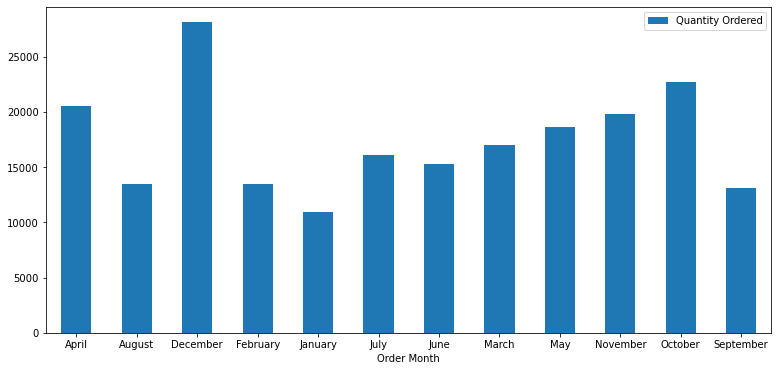

In [105]:
each_month.plot.bar(rot=0, figsize=(13, 6))

<hr>

## 3) Which state has ordered the least and which the highest?

In [96]:
dataset[dataset["Quantity Ordered"] == dataset["Quantity Ordered"].min()]["State"].unique()

array(['MA', 'CA', 'WA', 'GA', 'TX', 'NY', 'OR', 'ME'], dtype=object)

In [97]:
dataset[dataset["Quantity Ordered"] == dataset["Quantity Ordered"].max()]["State"].unique()

array(['CA'], dtype=object)

<hr>

## 4) At what time of the day the highest amount of money is spent on sales?

In [98]:
time = dataset["Order Date"].str.split().str[-1]
time

0         08:46
2         22:30
3         14:38
4         14:38
5         09:27
          ...  
186845    20:56
186846    16:00
186847    07:39
186848    17:30
186849    00:18
Name: Order Date, Length: 185950, dtype: object

In [99]:
def mapping_fun(sample):
    h, m = int(sample[:2]), int(sample[3:])   # hours and minutes
    if h >= 6 and h < 12:
        return "morning"
    elif h >= 12 and h < 17:
        return "afternoon"
    elif h >= 17 and h < 21:
        return "evening"
    else:
        return "night"

time = time.apply(lambda x: mapping_fun(x))

In [100]:
dataset["Order Time"] = time
dataset["Spent Money"] = dataset["Quantity Ordered"] * dataset["Price Each"]
dataset

/tmp/ipykernel_65472/83630492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Order Time"] = time
/tmp/ipykernel_65472/83630492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Spent Money"] = dataset["Quantity Ordered"] * dataset["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,State,Order Time,Spent Money
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,TX,morning,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,MA,night,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,CA,afternoon,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,CA,afternoon,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,CA,morning,11.99
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September,CA,evening,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September,CA,afternoon,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September,CA,morning,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September,CA,evening,379.99


In [102]:
# On average at the evening it is spent the most
pd.pivot_table(dataset, values='Spent Money', index='Order Time')

,Spent Money
Order Time,
afternoon,184.895479
evening,187.186717
morning,184.367334
night,185.544743


In [103]:
# If we consider only max numbers, then afternoon, morning and night have the same max result 3400
pd.pivot_table(dataset, values='Spent Money', index='Order Time', aggfunc=np.max)

,Spent Money
Order Time,
afternoon,3400.00
evening,1999.98
morning,3400.00
night,3400.00


<hr>

<h1>
<i>
4. Time to plot.
<i>
</h1>
    
# Tasks:

   >  1. Plot the bar chart that represents different items bought on the x-axis and how many of them were sold on the y-axis.
   >  2. Plot a pie char that represents each month as the piece of the pie, showing how much sales are generally done.



<hr>

## 1) Plot the bar chart that represents different items bought on the x-axis and how many of them were sold on the y-axis.

In [114]:
products_sold_sum = pd.pivot_table(dataset, values='Quantity Ordered', index='Product', aggfunc=np.sum)
products_sold_sum

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


<AxesSubplot:xlabel='Product'>

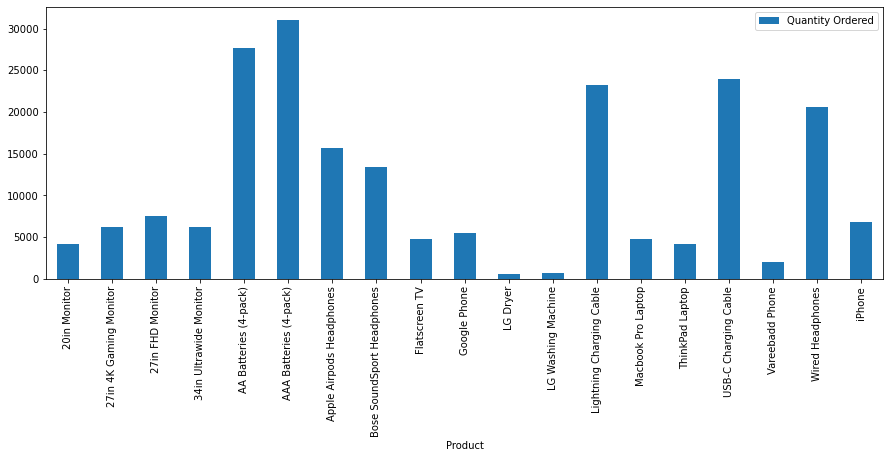

In [115]:
products_sold_sum.plot.bar(figsize=(15, 5))

<hr>

## 2) Plot a pie chart that represents each month as the piece of the pie, showing how much sales are generally done.

In [118]:
products_month_sale = pd.pivot_table(dataset, values='Quantity Ordered', index='Order Month', aggfunc=np.sum)
products_month_sale

,Quantity Ordered
Order Month,
April,20558
August,13448
December,28114
February,13449
January,10903
July,16072
June,15253
March,17005
May,18667


<AxesSubplot:ylabel='Quantity Ordered'>

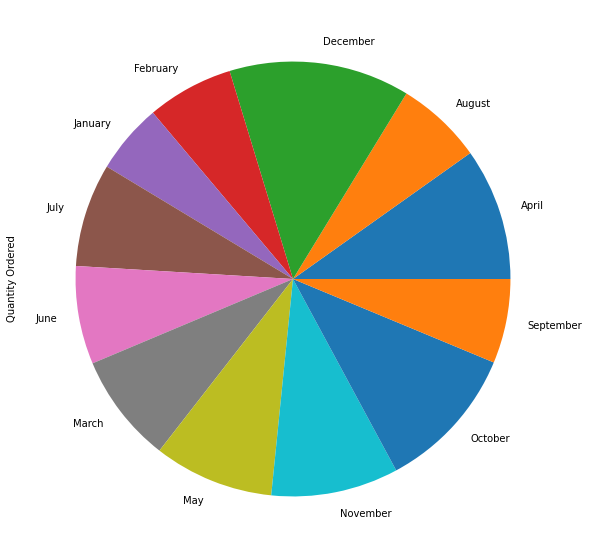

In [141]:
products_month_sale.plot.pie(x='Order Month', y='Quantity Ordered', figsize=(10, 10), legend=False)

<h1>
<i>
 5. More info with the plots.
</i>
</h1>

# Tasks:

 >    1. Prove the answer to the question four in the third part (Get the useful information).
 >    2. Referring to the question 1 of the 4th part (Time to plot), plot that bar chart again but with adding a line chart inside onto it representing the price of each item.

<hr>

## 1) Prove the answer to the question four in the third part (Get the useful information).

In [123]:
# On average at the evening it is spent the most
products_avg_sales = pd.pivot_table(dataset, values='Spent Money', index='Order Time')
products_avg_sales

,Spent Money
Order Time,
afternoon,184.895479
evening,187.186717
morning,184.367334
night,185.544743


<AxesSubplot:ylabel='Spent Money'>

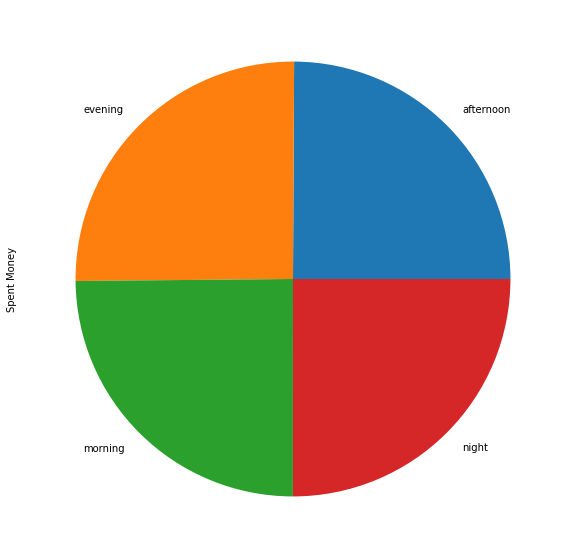

In [129]:
# almost equal, but from avg_sales we know that evening is the max value
products_avg_sales.plot.pie(figsize=(10, 10), x='Order Time', y='Spent Money', legend=False)

In [132]:
# If we consider only max numbers, then afternoon, morning and night have the same max result 3400
products_max_sales = pd.pivot_table(dataset, values='Spent Money', index='Order Time', aggfunc=np.max)
products_max_sales

,Spent Money
Order Time,
afternoon,3400.00
evening,1999.98
morning,3400.00
night,3400.00


<AxesSubplot:ylabel='Spent Money'>

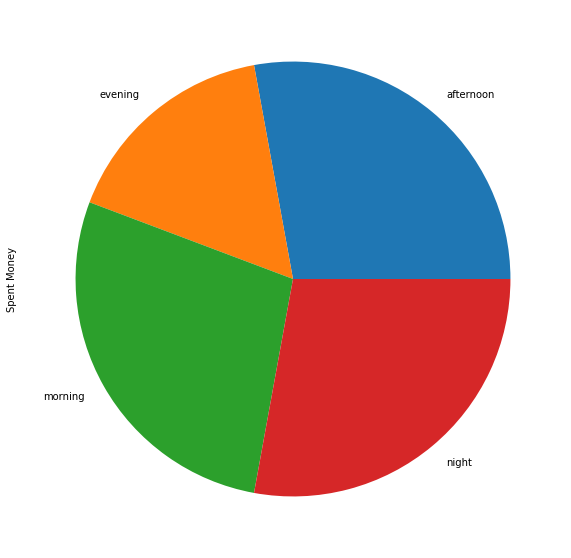

In [135]:
products_max_sales.plot.pie(figsize=(10, 10), x='Order Time', y='Spent Money', legend=False)

<hr>

## 2) Referring to the question 1 of the 4th part (Time to plot), plot that bar chart again but with adding a line chart inside onto it representing the price of each item.

In [138]:
# price of each product
products_prices = pd.pivot_table(dataset, values='Price Each', index='Product')
products_prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


<AxesSubplot:xlabel='Product'>

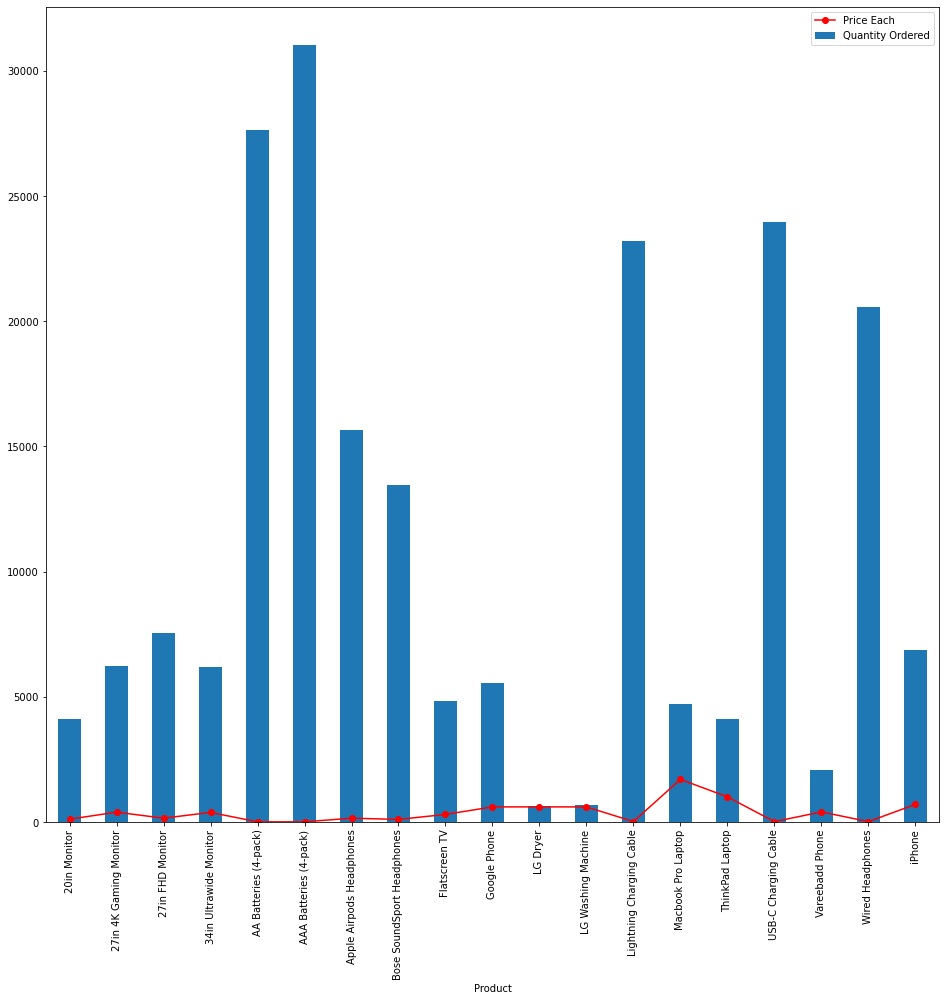

In [139]:
ax = products_prices.plot(linestyle='-', marker='o', color='red')
sold_sum.plot.bar(figsize=(16, 15), ax=ax)

<hr>

## The answers for the tasks given to the Core Team of the ML Club

> March 22, 2022 9:23 PM <br>
> Supreme Council